## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

## Importing Data and Data Description

In [2]:
df = pd.read_csv("fetal_health.csv")
print("Data Frame Shape is",df.shape,"\n")
print("Name of Columns are\n",df.columns,"\n")


df.columns = ['Baseline Value', 'Accelerations', 'Fetal Movement',
       'Uterine Contractions', 'Light Decelerations', 'Severe Decelerations',
       'Prolongued Decel', 'Abnormal SV',
       'Mean SV',
       'Percent LV',
       'Mean LV', 'His Width',
       'His Min', 'His Max', 'His Peak',
       'His Zeros', 'His Mode', 'His Mean',
       'His Median', 'His Var', 'His Tend',
       'Fetal Health']




print(df.describe().T)
df.describe().T.to_csv("01 - Full_Data_Set_Description.csv")

Data Frame Shape is (2126, 22) 

Name of Columns are
 Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object') 

                       count        mean        std    min      25%      50%  \
Baseline Value        2126.0  133.303857   9.840844  106.0  126.000  133.000   
Accelerations         2126.0    0.003178   0.003866    0.0    0.000    0.002   
Fetal Movement        2126.0    0.009481   0.046666    0.0 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Baseline Value        2126 non-null   float64
 1   Accelerations         2126 non-null   float64
 2   Fetal Movement        2126 non-null   float64
 3   Uterine Contractions  2126 non-null   float64
 4   Light Decelerations   2126 non-null   float64
 5   Severe Decelerations  2126 non-null   float64
 6   Prolongued Decel      2126 non-null   float64
 7   Abnormal SV           2126 non-null   float64
 8   Mean SV               2126 non-null   float64
 9   Percent LV            2126 non-null   float64
 10  Mean LV               2126 non-null   float64
 11  His Width             2126 non-null   float64
 12  His Min               2126 non-null   float64
 13  His Max               2126 non-null   float64
 14  His Peak              2126 non-null   float64
 15  His Zeros            

## Correlation Analysis

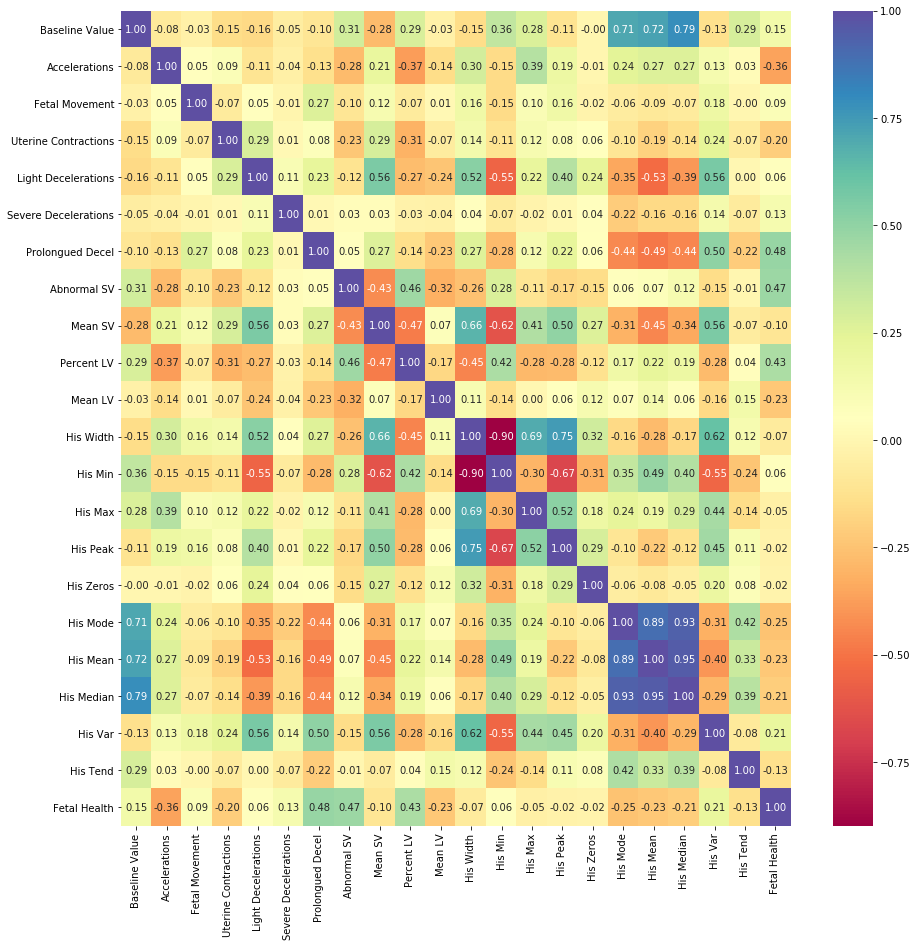

In [4]:
correlation = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(correlation, cmap='Spectral',fmt='.2f',annot=True)
plt.savefig('02 - All_Predictors_Correlation.jpeg')
plt.show()


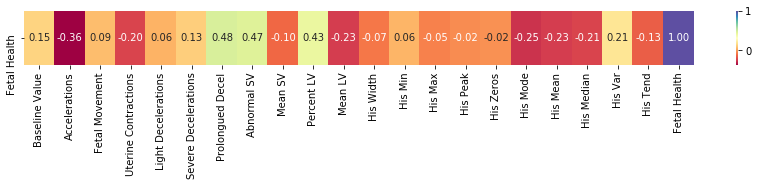

In [5]:
plt.figure(figsize = (15,1))
sns.heatmap(correlation.sort_values(by=["Fetal Health"], ascending=False).head(1), cmap='Spectral',fmt='.2f',annot=True)
plt.show()

In [6]:
print(correlation["Fetal Health"].sort_values(ascending = False))
correlation["Fetal Health"].sort_values(ascending = False).to_csv("04 - All_Predictors_Correlation_Response.csv")

Fetal Health            1.000000
Prolongued Decel        0.484859
Abnormal SV             0.471191
Percent LV              0.426146
His Var                 0.206630
Baseline Value          0.148151
Severe Decelerations    0.131934
Fetal Movement          0.088010
His Min                 0.063175
Light Decelerations     0.058870
His Zeros              -0.016682
His Peak               -0.023666
His Max                -0.045265
His Width              -0.068789
Mean SV                -0.103382
His Tend               -0.131976
Uterine Contractions   -0.204894
His Median             -0.205033
Mean LV                -0.226797
His Mean               -0.226985
His Mode               -0.250412
Accelerations          -0.364066
Name: Fetal Health, dtype: float64


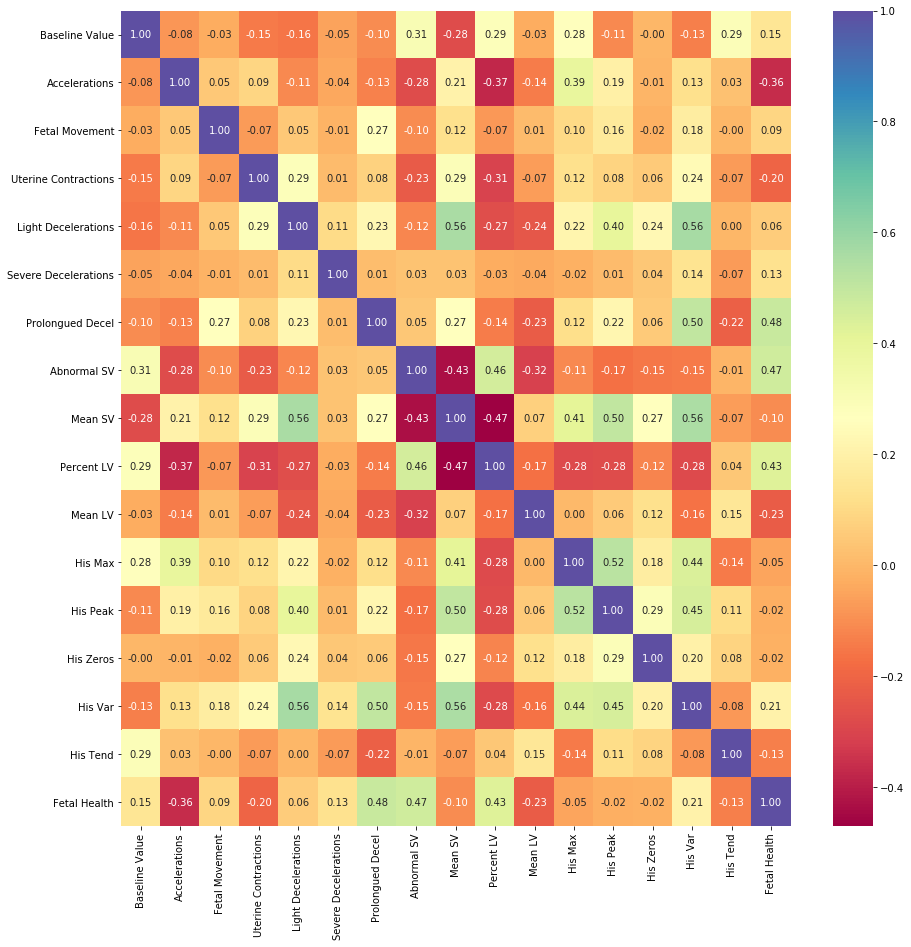

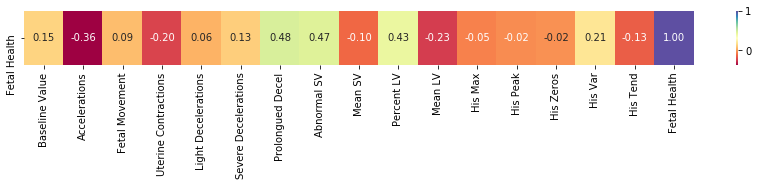

In [7]:
df= df.drop(columns=['His Width', 'His Min','His Mode','His Mean','His Median'])
correlation = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(correlation, cmap='Spectral',fmt='.2f',annot=True)
plt.savefig('05 - Selected_Predictors_Correlation.jpeg')
plt.show()

plt.figure(figsize = (15,1))
sns.heatmap(correlation.sort_values(by=["Fetal Health"], ascending=False).head(1), cmap='Spectral',fmt='.2f',annot=True)
plt.show()

correlation["Fetal Health"].sort_values(ascending = False).to_csv("07 - Selected_Predictors_Correlation_Response.csv")

## Upsampling (Not Included)

In [8]:
# df.hist(figsize = (25,25), color = "#7fffd4")
# plt.figure()
# sns.countplot(x = df["Fetal Health"],palette = "Paired_r").set(xlabel ="Fetal Health",ylabel = "Count")
# plt.title("Count of Each Category")

In [9]:
# print(df["fetal_health"].value_counts(),"\n")
# df_Normal = df[df["fetal_health"] == 1.0]
# df_Suspect = df[df["fetal_health"] == 2.0]
# df_Pathological = df[df["fetal_health"] == 3.0]
# df_Suspect = df_Suspect.sample(len(df_Normal),replace = True)
# df_Pathological = df_Pathological.sample(len(df_Normal),replace = True)
# frames = [df_Normal,df_Suspect,df_Pathological]
# final_df = pd.concat(frames)
# print(final_df["fetal_health"].value_counts())
# df = final_df
# df = df.reset_index(drop=True)

# plt.figure()
# sns.countplot(x = df["fetal_health"],palette = "Paired_r").set(xlabel ="Fetal Health",ylabel = "Count")
# plt.title("Count of Each Category")

In [10]:
df.head(20)

,Baseline Value,Accelerations,Fetal Movement,Uterine Contractions,Light Decelerations,Severe Decelerations,Prolongued Decel,Abnormal SV,Mean SV,Percent LV,Mean LV,His Max,His Peak,His Zeros,His Var,His Tend,Fetal Health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.000,73.0,0.5,43.0,2.4,126.0,2.0,0.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.000,17.0,2.1,0.0,10.4,198.0,6.0,1.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.1,0.0,13.4,198.0,5.0,1.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.4,0.0,23.0,170.0,11.0,0.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.000,16.0,2.4,0.0,19.9,170.0,9.0,0.0,11.0,1.0,1.0
5,134.0,0.001,0.000,0.010,0.009,0.0,0.002,26.0,5.9,0.0,0.0,200.0,5.0,3.0,170.0,0.0,3.0
6,134.0,0.001,0.000,0.013,0.008,0.0,0.003,29.0,6.3,0.0,0.0,200.0,6.0,3.0,215.0,0.0,3.0
7,122.0,0.000,0.000,0.000,0.000,0.0,0.000,83.0,0.5,6.0,15.6,130.0,0.0,0.0,3.0,1.0,3.0
8,122.0,0.000,0.000,0.002,0.000,0.0,0.000,84.0,0.5,5.0,13.6,130.0,0.0,0.0,3.0,1.0,3.0
9,122.0,0.000,0.000,0.003,0.000,0.0,0.000,86.0,0.3,6.0,10.6,130.0,1.0,0.0,1.0,1.0,3.0


## Normalization

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
features = list(df.columns)
features.remove("Fetal Health")
features.remove("His Tend")
scalar = StandardScaler()
# the fit_transform ops returns a 2d numpy.array, we cast it to a pd.DataFrame
standardized_features = pd.DataFrame(scalar.fit_transform(df[features].copy()), columns = features)
old_shape = df.shape
# drop the unnormalized features from the dataframe
df.drop(features, axis = 1, inplace = True)
# join back the normalized features
df = pd.concat([standardized_features,df], axis= 1)
assert old_shape == df.shape, "something went wrong!"

In [12]:
df.head(20)

,Baseline Value,Accelerations,Fetal Movement,Uterine Contractions,Light Decelerations,Severe Decelerations,Prolongued Decel,Abnormal SV,Mean SV,Percent LV,Mean LV,His Max,His Peak,His Zeros,His Var,His Tend,Fetal Health
0,-1.352220,-0.822388,-0.203210,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,-1.028560,-2.119592,-0.701397,-0.458444,1.870569,1.0,2.0
1,-0.132526,0.730133,-0.203210,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,0.393176,1.893794,0.655137,0.958201,-0.234998,0.0,1.0
2,-0.030884,-0.046128,-0.203210,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,0.926327,1.893794,0.316003,0.958201,-0.200481,0.0,1.0
3,0.070757,-0.046128,-0.203210,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.632411,0.333033,2.350804,-0.458444,-0.200481,1.0,1.0
4,-0.132526,0.988886,-0.203210,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.081488,0.333033,1.672537,-0.458444,-0.269516,1.0,1.0
5,0.070757,-0.563635,-0.203210,1.912687,2.402604,-0.057476,3.122175,-1.221153,5.172188,-0.535361,-1.455081,2.005277,0.316003,3.791490,5.218765,0.0,3.0
6,0.070757,-0.563635,-0.203210,2.931233,2.064711,-0.057476,4.817640,-1.046621,5.625172,-0.535361,-1.455081,2.005277,0.655137,3.791490,6.772052,0.0,3.0
7,-1.148938,-0.822388,-0.203210,-1.482465,-0.638438,-0.057476,-0.268754,2.094965,-0.943095,-0.209142,1.317304,-1.896626,-1.379664,-0.458444,-0.545656,1.0,3.0
8,-1.148938,-0.822388,-0.203210,-0.803434,-0.638438,-0.057476,-0.268754,2.153143,-0.943095,-0.263512,0.961870,-1.896626,-1.379664,-0.458444,-0.545656,1.0,3.0
9,-1.148938,-0.822388,-0.203210,-0.463919,-0.638438,-0.057476,-0.268754,2.269498,-1.169587,-0.209142,0.428719,-1.896626,-1.040530,-0.458444,-0.614691,1.0,3.0


## Splitting For Multiple Logistic Regression

In [13]:
df_Normal = df.copy()
df_Suspect = df.copy()
df_Pathological = df.copy()

df_Normal.loc[df_Normal["Fetal Health"] != 1, "Fetal Health"] = 0
df_Suspect.loc[df_Suspect["Fetal Health"] != 2, "Fetal Health"] = 0
df_Suspect.loc[df_Suspect["Fetal Health"] == 2, "Fetal Health"] = 1
df_Pathological.loc[df_Pathological["Fetal Health"] != 3, "Fetal Health"] = 0
df_Pathological.loc[df_Pathological["Fetal Health"] == 3, "Fetal Health"] = 1

# df_Normal.loc[df_Normal["Fetal Health"] == 1, "Fetal Health"] = "Normal"
# df_Normal.loc[df_Normal["Fetal Health"] != "Normal", "Fetal Health"] = "Non - Normal"
# df_Suspect.loc[df_Suspect["Fetal Health"] == 2, "Fetal Health"] = "Suspect"
# df_Suspect.loc[df_Suspect["Fetal Health"] != "Suspect", "Fetal Health"] = "Non - Suspect"
# df_Pathological.loc[df_Pathological["Fetal Health"] == 3, "Fetal Health"] = "Pathological"
# df_Pathological.loc[df_Pathological["Fetal Health"] != "Pathological", "Fetal Health"] = "Non - Pathological"



df_Normal.to_csv('Normal.csv', index = False, header=True)
df_Suspect.to_csv('Suspect.csv', index = False, header=True)
df_Pathological.to_csv('Pathlogical.csv', index = False, header=True)

In [14]:
df_Pathological.head()

,Baseline Value,Accelerations,Fetal Movement,Uterine Contractions,Light Decelerations,Severe Decelerations,Prolongued Decel,Abnormal SV,Mean SV,Percent LV,Mean LV,His Max,His Peak,His Zeros,His Var,His Tend,Fetal Health
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,-1.028560,-2.119592,-0.701397,-0.458444,1.870569,1.0,0.0
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,0.393176,1.893794,0.655137,0.958201,-0.234998,0.0,0.0
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,0.926327,1.893794,0.316003,0.958201,-0.200481,0.0,0.0
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.632411,0.333033,2.350804,-0.458444,-0.200481,1.0,0.0
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.081488,0.333033,1.672537,-0.458444,-0.269516,1.0,0.0


In [15]:
df_Normal["Fetal Health"].value_counts().to_csv("08 - Post_Split_Data_Normal.csv")
df_Suspect["Fetal Health"].value_counts().to_csv("09 - Post_Split_Suspect.csv")
df_Pathological["Fetal Health"].value_counts().to_csv("10 - Post_Split_Pathological.csv")

